<a href="https://colab.research.google.com/github/Aninha-create/challenge_DS_Alura/blob/main/AluraStoreBr_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
from os import replace

#soma o faturamento de cada loja

fat_total1 = loja['Preço'].sum()
fat_total2 = loja2['Preço'].sum()
fat_total3 = loja3['Preço'].sum()
fat_total4 = loja4['Preço'].sum()

#formatando a saída em estilo brasileiro

print(f'\U0001F4B0 O faturamento total da loja 1 foi de R$ {fat_total1:,.2f}'.replace(',','v').replace('.',',').replace('v','.'))
print(f'\U0001F4B0 O faturamento total da loja 2 foi de R$ {fat_total2:,.2f}'.replace(',','v').replace('.',',').replace('v','.'))
print(f'\U0001F4B0 O faturamento total da loja 3 foi de R$ {fat_total3:,.2f}'.replace(',','v').replace('.',',').replace('v','.'))
print(f'\U0001F4B0 O faturamento total da loja 4 foi de R$ {fat_total4:,.2f}'.replace(',','v').replace('.',',').replace('v','.'))


💰 O faturamento total da loja 1 foi de R$ 1.534.509,12
💰 O faturamento total da loja 2 foi de R$ 1.488.459,06
💰 O faturamento total da loja 3 foi de R$ 1.464.025,03
💰 O faturamento total da loja 4 foi de R$ 1.384.497,58


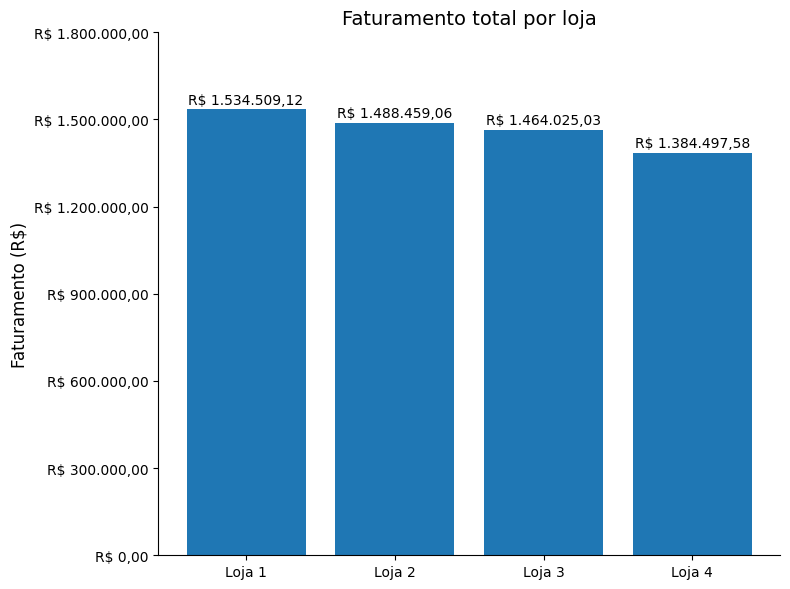

In [3]:
# Faturamentos calculados
faturamentos = [fat_total1, fat_total2, fat_total3, fat_total4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criação do gráfico
fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(lojas, faturamentos, color='#1f77b4')  # cor única

# Adiciona os valores acima das barras
for barra in barras:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, valor + 10000,
            f'R$ {valor:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
            ha='center', va='bottom', fontsize=10)

# Título e eixos
ax.set_title('Faturamento total por loja', fontsize=14)
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_ylim(0, max(faturamentos) + 100000)

# Personalização do eixo Y com intervalo de 300.000
ax.set_yticks(range(0, int(max(faturamentos)) + 300000, 300000))
ax.set_yticklabels([f'R$ {valor:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.') for valor in ax.get_yticks()])

# Remoção das bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [4]:
# Função para gerar tabela formatada por loja
def resumo_por_categoria(df, nome_loja):
    tabela = df.groupby('Categoria do Produto').agg(
        Unidades_Vendidas=('Categoria do Produto', 'count'),
        Valor_Total=('Preço', 'sum')
    ).sort_values(by='Unidades_Vendidas', ascending=False)

    # Formatar valores
    tabela['Valor_Total'] = tabela['Valor_Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    print(f'\U0001F4E6 Vendas por categoria - {nome_loja}')
    print(tabela.reset_index().to_string(index=False))

# Aplicar para cada loja
resumo_por_categoria(loja, 'Loja 1')
resumo_por_categoria(loja2, 'Loja 2')
resumo_por_categoria(loja3, 'Loja 3')
resumo_por_categoria(loja4, 'Loja 4')

📦 Vendas por categoria - Loja 1
 Categoria do Produto  Unidades_Vendidas   Valor_Total
               moveis                465 R$ 250.178,11
          eletronicos                448 R$ 572.659,23
           brinquedos                324  R$ 23.993,78
     eletrodomesticos                312 R$ 484.913,36
      esporte e lazer                284  R$ 52.387,55
instrumentos musicais                182 R$ 121.731,69
               livros                173  R$ 11.713,92
utilidades domesticas                171  R$ 16.931,48
📦 Vendas por categoria - Loja 2
 Categoria do Produto  Unidades_Vendidas   Valor_Total
               moveis                442 R$ 235.234,68
          eletronicos                422 R$ 547.773,71
           brinquedos                313  R$ 21.262,21
     eletrodomesticos                305 R$ 464.758,13
      esporte e lazer                275  R$ 46.326,09
instrumentos musicais                224 R$ 139.987,03
               livros                197  R$ 13.454,35
u

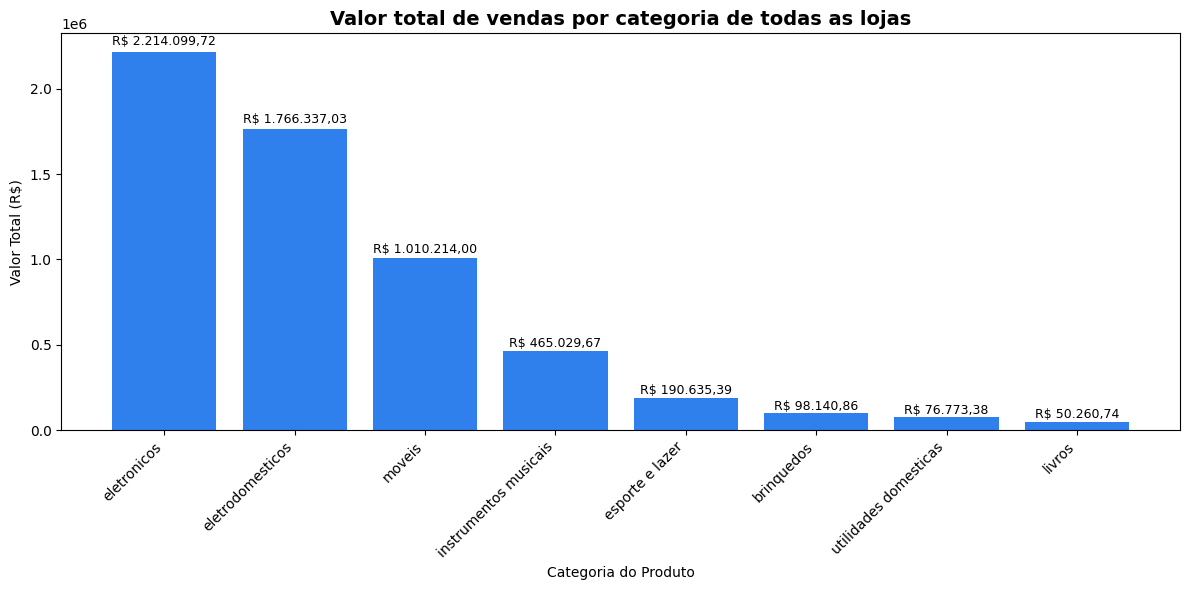

In [8]:
# Juntar todas as lojas
todas = pd.concat([loja, loja2, loja3, loja4])

# Agrupar por categoria e somar o valor total vendido
categoria_valores = todas.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# Ordenar em ordem decrescente de valor
categoria_valores = categoria_valores.sort_values(by='Preço', ascending=False)

# ---- PLOTAGEM ----
plt.figure(figsize=(12,6))
bars = plt.bar(categoria_valores['Categoria do Produto'], categoria_valores['Preço'], color="#2F80ED")

# Adicionar os valores em cima das colunas
for bar, valor in zip(bars, categoria_valores['Preço']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01*valor),
             f"R$ {valor:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.'),
             ha='center', va='bottom', fontsize=9)

# Estilo do gráfico
plt.title("Valor total de vendas por categoria de todas as lojas", fontsize=14, weight='bold')
plt.xlabel("Categoria do Produto")
plt.ylabel("Valor Total (R$)")

# Ajuste dos nomes no eixo X
plt.xticks(rotation=45, ha="right")   # Rotaciona para não sobrepor
plt.subplots_adjust(bottom=0.25)     # Dá mais espaço abaixo do gráfico

# Fundo branco e sem grid
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.grid(False)

plt.tight_layout()
plt.show()







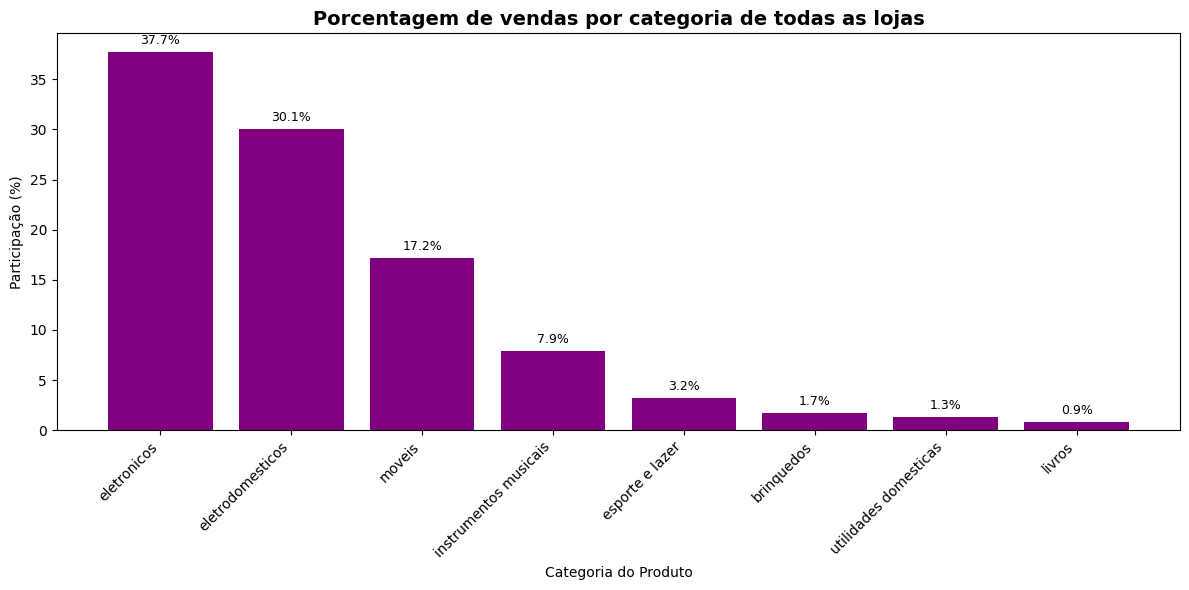

In [9]:
# Juntar todas as lojas
todas = pd.concat([loja, loja2, loja3, loja4])

# Agrupar por categoria e calcular valor total
categoria_valores = todas.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# Calcular porcentagem de cada categoria
categoria_valores['Porcentagem'] = (categoria_valores['Preço'] / categoria_valores['Preço'].sum()) * 100

# Ordenar em ordem decrescente de participação
categoria_valores = categoria_valores.sort_values(by='Porcentagem', ascending=False)

# ---- PLOTAGEM ----
plt.figure(figsize=(12,6))
bars = plt.bar(categoria_valores['Categoria do Produto'], categoria_valores['Porcentagem'], color="purple")

# Adicionar os valores em cima das colunas
for bar, valor in zip(bars, categoria_valores['Porcentagem']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{valor:.1f}%", ha='center', va='bottom', fontsize=9)

# Estilo do gráfico
plt.title("Porcentagem de vendas por categoria de todas as lojas", fontsize=14, weight='bold')
plt.xlabel("Categoria do Produto")
plt.ylabel("Participação (%)")

# Ajuste dos nomes no eixo X
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.25)

# Fundo branco e sem grid
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.grid(False)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3081462993.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cores = plt.cm.get_cmap('tab10', num_categorias)


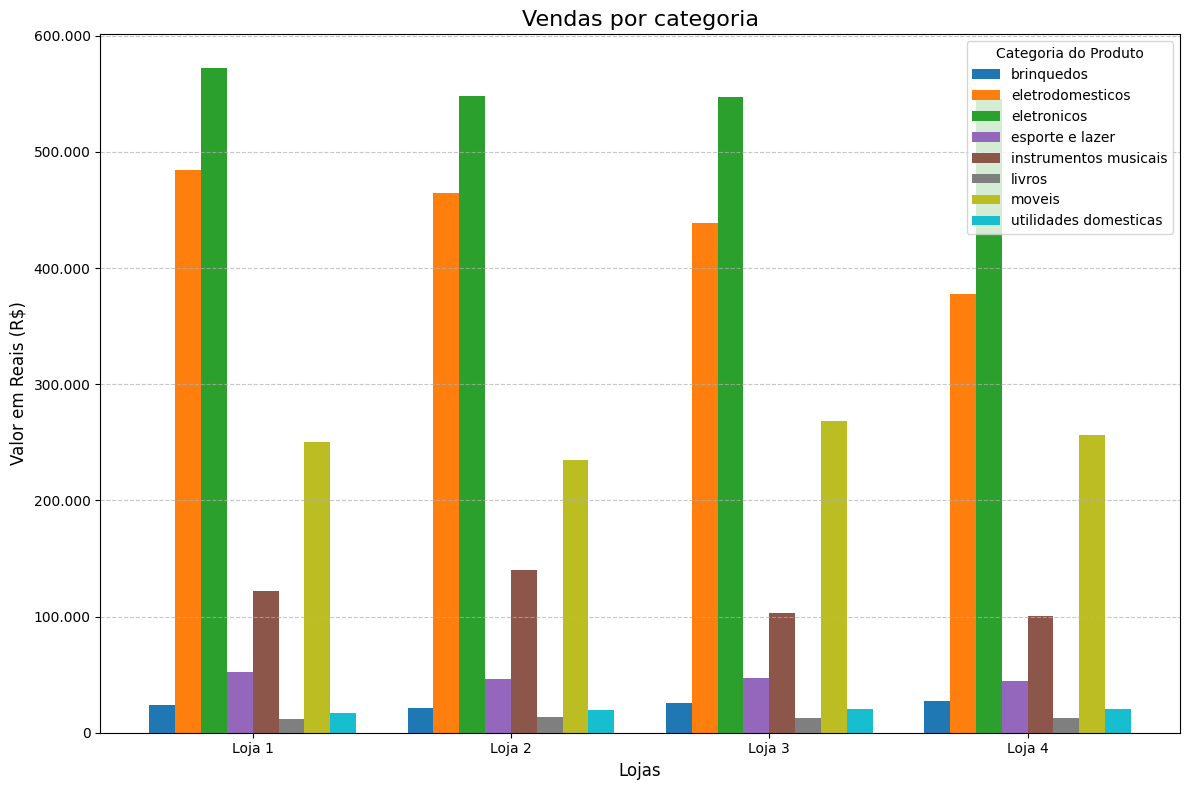

In [10]:
import matplotlib.ticker as ticker

# URLs dos dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Função para tratar categorias múltiplas
def tratar_dados(df):
    df = df.copy()
    df['Categoria do Produto'] = df['Categoria do Produto'].str.split(',')
    df = df.explode('Categoria do Produto')
    df['Categoria do Produto'] = df['Categoria do Produto'].str.strip()
    return df

# Criar dicionário com os dados tratados
dados_por_loja = {}
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df = tratar_dados(df)
    resumo = df.groupby('Categoria do Produto')['Preço'].sum()
    dados_por_loja[nome_loja] = resumo

# Obter todas as categorias únicas
todas_categorias = sorted(set().union(*[resumo.index for resumo in dados_por_loja.values()]))

# Criar DataFrame consolidado
df_final = pd.DataFrame(index=todas_categorias)
for loja, resumo in dados_por_loja.items():
    df_final[loja] = resumo
df_final = df_final.fillna(0)

# Preparar gráfico
fig, ax = plt.subplots(figsize=(12, 8))

num_lojas = len(df_final.columns)
num_categorias = len(df_final.index)
largura_barra = 0.8 / num_categorias  # espaço para cada categoria dentro de cada loja

x = np.arange(num_lojas)  # posição das lojas no eixo X

# Cores diferentes para cada categoria
cores = plt.cm.get_cmap('tab10', num_categorias)

for i, categoria in enumerate(df_final.index):
    valores = df_final.loc[categoria]
    posicoes = x + i * largura_barra
    ax.bar(posicoes, valores, width=largura_barra, label=categoria, color=cores(i))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Configurações do gráfico
ax.set_title('Vendas por categoria', fontsize=16)
ax.set_xlabel('Lojas', fontsize=12)
ax.set_ylabel('Valor em Reais (R$)', fontsize=12)
ax.set_xticks(x + largura_barra * (num_categorias / 2 - 0.5))
ax.set_xticklabels(df_final.columns)
#ax.set_yticks(range(0, int(df_final.values.max()) + 100000, 100000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
ax.legend(title='Categoria do Produto')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('grafico_valores_lojas.png', dpi=300)
plt.show()

# 3. Média de Avaliação das Lojas

In [13]:
loja1_aval = loja["Avaliação da compra"].mean()
loja2_aval = loja2["Avaliação da compra"].mean()
loja3_aval = loja3["Avaliação da compra"].mean()
loja4_aval = loja4["Avaliação da compra"].mean()
print(f'A avaliação média da loja 1 foi de {loja1_aval:.2f}\U00002B50')
print(f'A avaliação média da loja 2 foi de {loja2_aval:.2f}\U00002B50')
print(f'A avaliação média da loja 3 foi de {loja3_aval:.2f}\U00002B50')
print(f'A avaliação média da loja 4 foi de {loja4_aval:.2f}\U00002B50')



A avaliação média da loja 1 foi de 3.98⭐
A avaliação média da loja 2 foi de 4.04⭐
A avaliação média da loja 3 foi de 4.05⭐
A avaliação média da loja 4 foi de 4.00⭐


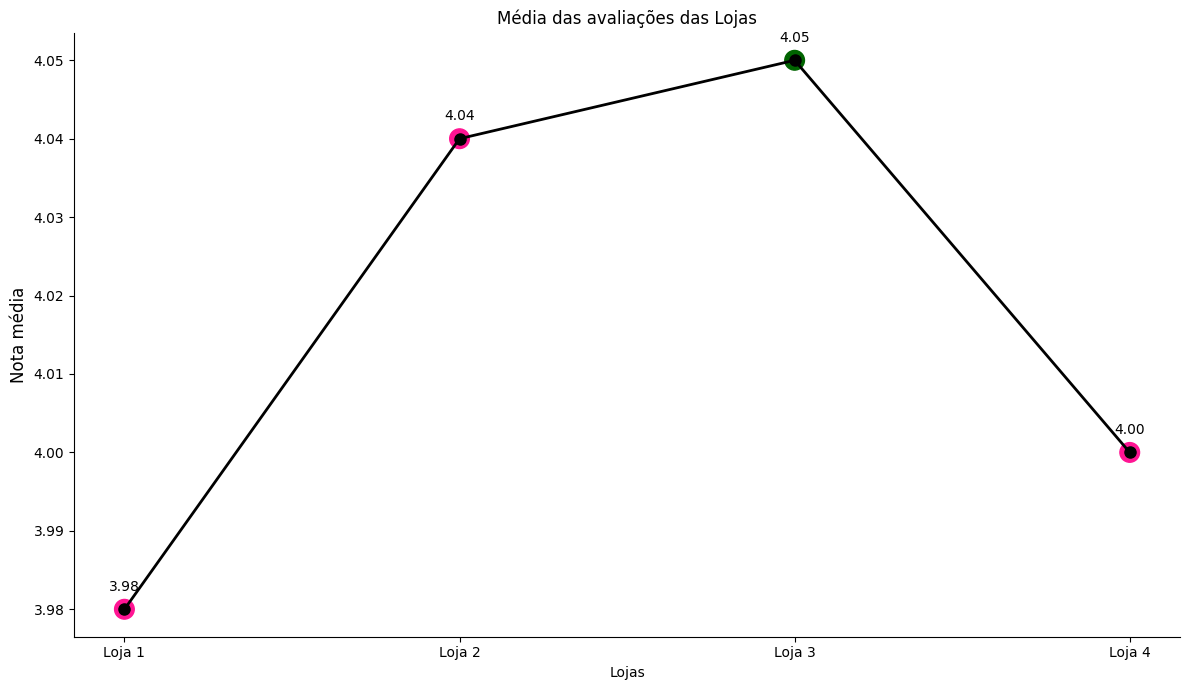

In [14]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
cores = ['deeppink', 'deeppink', 'darkgreen', 'deeppink']

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(12, 7))

# Definindo fundo branco
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

# Plotando linha preta com marcadores
plt.plot(lojas, avaliacoes, marker='o', linestyle='-', color='#000000', linewidth=2, markersize=8)

# Plotando os pontos coloridos
plt.scatter(x, avaliacoes, color=cores, s=200)

# Adicionando os valores acima dos pontos
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.002, f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

# Configurando os rótulos do eixo X
plt.xticks(x, lojas)

# Adicionando título e rótulos aos eixos
plt.title("Média das avaliações das Lojas", fontsize=12)
plt.xlabel("Lojas", fontsize=10)
plt.ylabel("Nota média", fontsize=12)

# Removendo grade e linhas dos eixos
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [15]:
# Lista com os dados de cada loja
dados_lojas = [
    ('Loja 1', loja),
    ('Loja 2', loja2),
    ('Loja 3', loja3),
    ('Loja 4', loja4)
]

# Lista para armazenar os resultados
resultado = []

# Loop pelas lojas
for nome, df in dados_lojas:
    contagem = df['Produto'].value_counts()
    mais_vendido = contagem.idxmax()
    unidades = contagem.max()
    menos_vendido = contagem.idxmin()
    Unidades = contagem.min()

    resultado.append([
        nome,
        mais_vendido,
        unidades,
        menos_vendido,
        Unidades
    ])

# Criar DataFrame sem índice nomeado
df_resultado = pd.DataFrame(
    resultado,
    columns=[
        '\U0001F3EA Loja',
        '\U0001F6D2 Produto Mais Vendido',
        '\U0001F6D2 unidades',
        '\U0001F6D2 Produto Menos Vendido',
        '\U0001F6D2 Unidades'
    ]
)

# Exibir o DataFrame como uma única linha por loja, sem índice
print(df_resultado.to_string(index=False))

🏪 Loja   🛒 Produto Mais Vendido  🛒 unidades 🛒 Produto Menos Vendido  🛒 Unidades
Loja 1              Micro-ondas          60                 Headset          33
Loja 2 Iniciando em programação          65       Jogo de tabuleiro          32
Loja 3            Kit banquetas          57        Blocos de montar          35
Loja 4                 Cama box          62                Guitarra          33


/tmp/ipython-input-3272011949.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='produto', y='quantidade', data=mais_vendidos, ax=axes[0], palette='viridis')
/tmp/ipython-input-3272011949.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='produto', y='quantidade', data=menos_vendidos, ax=axes[1], palette='plasma')


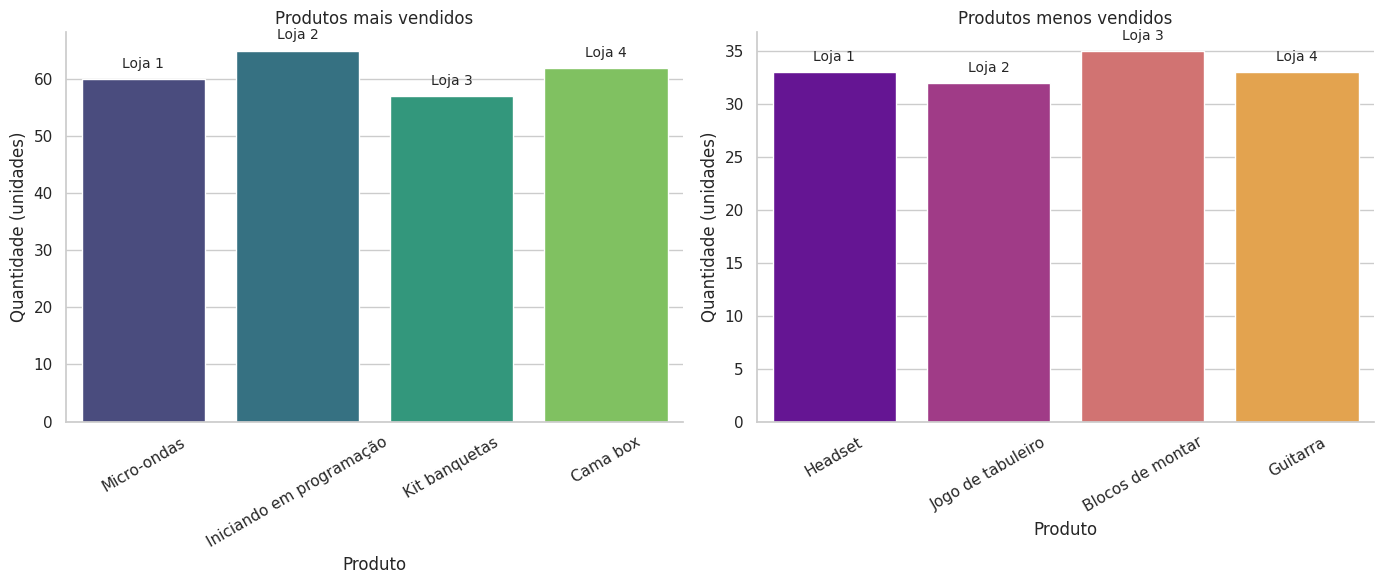

In [16]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Exemplo de dados (substitua com df_resultado real)
df_resultado = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Produto Mais Vendido': ['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box'],
    'unidades': [60, 65, 57, 62],
    'Produto Menos Vendido': ['Headset', 'Jogo de tabuleiro', 'Blocos de montar', 'Guitarra'],
    'Unidades': [33, 32, 35, 33]
})

# Preparar dados para os gráficos
mais_vendidos = pd.DataFrame({
    'produto': df_resultado['Produto Mais Vendido'],
    'quantidade': df_resultado['unidades'],
    'loja': df_resultado['Loja']
})

menos_vendidos = pd.DataFrame({
    'produto': df_resultado['Produto Menos Vendido'],
    'quantidade': df_resultado['Unidades'],
    'loja': df_resultado['Loja']
})

# Criar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de produtos mais vendidos
sns.barplot(x='produto', y='quantidade', data=mais_vendidos, ax=axes[0], palette='viridis')
axes[0].set_title('Produtos mais vendidos')
axes[0].set_xlabel('Produto')
axes[0].set_ylabel('Quantidade (unidades)')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='x', rotation=30)
for i, row in mais_vendidos.iterrows():
    axes[0].text(i, row['quantidade'] + 2, row['loja'], ha='center', fontsize=10)

# Gráfico de produtos menos vendidos
sns.barplot(x='produto', y='quantidade', data=menos_vendidos, ax=axes[1], palette='plasma')
axes[1].set_title('Produtos menos vendidos')
axes[1].set_xlabel('Produto')
axes[1].set_ylabel('Quantidade (unidades)')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='x', rotation=30)
for i, row in menos_vendidos.iterrows():
    axes[1].text(i, row['quantidade'] + 1, row['loja'], ha='center', fontsize=10)

# Mostrar os gráficos
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [17]:
loja1_frete = loja['Frete'].mean()
loja2_frete = loja2['Frete'].mean()
loja3_frete = loja3['Frete'].mean()
loja4_frete = loja4['Frete'].mean()
print(f'Custo médio do frete da loja 1: R$ {loja1_frete:,.2f}')
print(f'Custo médio do frete da loja 2: R$ {loja2_frete:,.2f}')
print(f'Custo médio do frete da loja 3: R$ {loja3_frete:,.2f}')
print(f'Custo médio do frete da loja 4: R$ {loja4_frete:,.2f}')


Custo médio do frete da loja 1: R$ 34.69
Custo médio do frete da loja 2: R$ 33.62
Custo médio do frete da loja 3: R$ 33.07
Custo médio do frete da loja 4: R$ 31.28


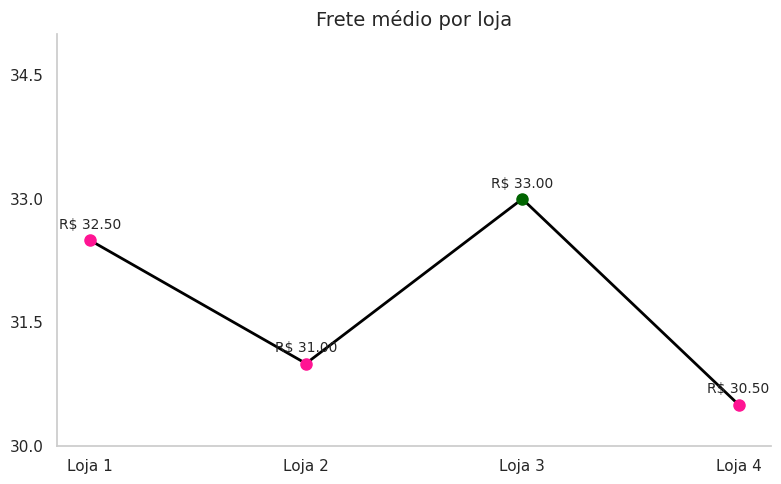

In [18]:
# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [32.5, 31.0, 33.0, 30.5]

# Identificar índice da loja com maior frete
indice_maior = fretes.index(max(fretes))

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remover grade e linhas dos eixos
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Plotar linha preta
ax.plot(lojas, fretes, color='black', linewidth=2)

# Adicionar marcadores
for i, (loja, frete) in enumerate(zip(lojas, fretes)):
    cor = 'darkgreen' if i == indice_maior else 'deeppink'
    ax.plot(loja, frete, marker='o', color=cor, markersize=8)
    ax.text(loja, frete + 0.1, f'R$ {frete:.2f}', ha='center', va='bottom', fontsize=10)

# Configurar eixo y
ax.set_ylim(30, 35)
ax.set_yticks([30, 31.5, 33, 34.5])

# Título
plt.title('Frete médio por loja', fontsize=14)

# Exibir gráfico
plt.tight_layout()
plt.show()

## Relatório final da rede Alura Store 📋


## 📊 Relatório de Análise de Desempenho das Lojas – Rede Alura Store  
**Analista responsável:** Ana Rachel Rodrigues da Costa  
**Objetivo:** Identificar a loja com menor retorno financeiro e recomendar ações estratégicas ao Sr. João, proprietário da rede.

---

### 🔍 Visão Geral dos Indicadores

#### 💰 Faturamento Total por Loja
| Loja     | Faturamento (R$)     |
|----------|----------------------|
| Loja 1   | 1.534.509,12         |
| Loja 2   | 1.488.459,06         |
| Loja 3   | 1.464.025,03         |
| **Loja 4**   | **1.384.497,58**         |

> **Loja 4 apresenta o menor faturamento da rede**, com uma diferença de R$ 150.011,54 em relação à Loja 1.

#### ⭐ Avaliação Média dos Clientes
| Loja     | Avaliação Média      |
|----------|----------------------|
| Loja 3   | 4,05                 |
| Loja 2   | 4,04                 |
| Loja 4   | 4,00                 |
| Loja 1   | 3,98                 |

> Loja 4 possui uma avaliação satisfatória, porém não se destaca frente às demais.

#### 📦 Frete Médio por Loja
| Loja     | Frete Médio (R$)     |
|----------|----------------------|
| **Loja 4**   | **31,28**               |
| Loja 3   | 33,07                 |
| Loja 2   | 33,62                 |
| Loja 1   | 34,69                 |

> Loja 4 oferece o frete mais competitivo, o que contribui positivamente para a experiência do cliente.

---

### 📊 Categorias de Maior Representatividade

As três principais categorias que impulsionam as vendas na rede Alura Store são:

- **Eletrônicos**: 37,7%
- **Eletrodomésticos**: 30,1%
- **Móveis**: 17,2%

Essas três categorias representam **85% do volume total de vendas**, gerando um faturamento consolidado de **R$ 4.990.650,75**.

---

### 📈 Análise Técnica e Estratégica

Apesar de a **Loja 1** apresentar o maior faturamento, ela também possui a **pior avaliação média (3,98)** e o **frete mais caro (R$ 34,69)**, o que pode indicar baixa satisfação e risco de perda de fidelização. Recomenda-se a implementação de uma nova política de marketing e logística para reverter esse cenário e potencializar os lucros.

Por outro lado, a **Loja 4**, embora tenha uma avaliação positiva (4,00) e o frete mais acessível (R$ 31,28), **não demonstra viabilidade financeira competitiva**. Seu faturamento é o mais baixo da rede, representando uma performance inferior mesmo em comparação com lojas que enfrentam desafios operacionais.

---

### ✅ Recomendação Estratégica

Com base nos dados analisados, recomenda-se ao Sr. João considerar a **venda da Loja 4**. Essa decisão é sustentada pelos seguintes argumentos:

- **Menor faturamento absoluto da rede**, com impacto direto na lucratividade.
- **Avaliação e frete não compensam o baixo retorno financeiro**.
- **Redirecionamento de demanda**: os clientes da Loja 4 podem ser absorvidos pelas demais unidades, otimizando a receita total da rede.
- **Redução de custos operacionais**: a venda da unidade permite realocação de recursos para lojas com maior potencial de crescimento.

---

### 📌 Conclusão

A venda da Loja 4 representa uma oportunidade estratégica para a Alura Store consolidar sua operação, aumentar a eficiência financeira e fortalecer as lojas com maior desempenho. A decisão é respaldada por dados objetivos e alinhada com práticas de gestão orientadas por resultados.







